### Titanic Data Analysis

In [13]:
import matplotlib.pyplot as plot
import plotly.express as px
import pandas as pd
import numpy as np



In [14]:
df = pd.read_csv('tested.csv')
df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 1. compare the number of survivors and non survivors, then visulize it using pie chart

In [15]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [16]:
px.pie(df, 'Survived', title= 'Survived Rate')#facet_col = 'Sex')

### 2. Generate a histogram and boxplot of age distribution

In [17]:
df['Age'].value_counts()


21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

In [18]:
px.histogram(df, 'Age')

In [19]:
px.box(df, 'Age')

### 3. count the number of passengers in different clasess(pclass), then visualize it using pie chart

In [20]:
df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [21]:
px.pie(df,'Pclass', title='Pclass of titanic')

### 4. generate a pivot table for gender and pclass and count the survivor n non-survivor

In [24]:
q= df.pivot_table(index= 'Sex', values= 'Survived', aggfunc= 'count')
q

,Survived
Sex,
female,152
male,266


In [25]:
px.bar(q)

### 5. genertae a plotly bar graph showing surving and non- surviving paasengers from each embarked port

In [26]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [27]:
px.bar(df, 'Embarked')

In [28]:
L=df.pivot_table(index= 'Embarked', columns= 'Pclass', values= 'Survived', aggfunc= 'count')
L

Pclass,1,2,3
Embarked,,,
C,56,11,35
Q,1,4,41
S,50,78,142


In [34]:
px.bar(L)

<AxesSubplot:xlabel='Embarked'>

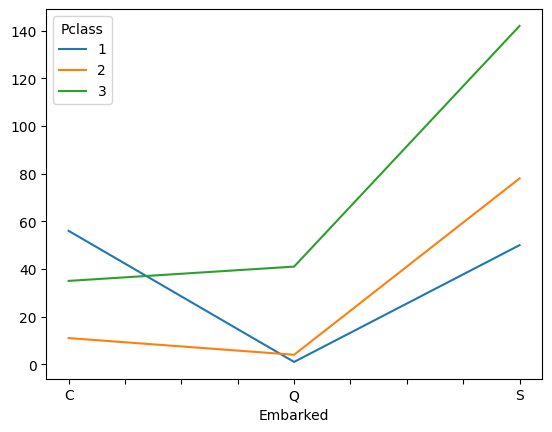

In [36]:
L.plot()

In [37]:
df.groupby(['Survived', 'Embarked']).sum().reset_index()

C:\Users\Manisha\AppData\Local\Temp\ipykernel_6972\3895017035.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Survived,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,C,67172,123,1517.50,26,17,3078.3668
1,0,Q,23826,62,325.50,5,1,205.8625
2,0,S,202299,436,4362.91,70,55,4010.6581
3,1,C,44485,60,1331.00,17,22,3680.1292
4,1,Q,26233,70,319.50,4,0,298.1917
5,1,S,95994,196,2194.09,65,69,3583.3293


In [38]:
portwise = df.groupby('Embarked')['Survived'].sum().reset_index()
px.bar(portwise, x = 'Embarked',y= 'Survived')

In [39]:
portwise = df.groupby('Embarked', as_index= False)['Survived'].value_counts()
px.bar(portwise, x = 'Embarked',y= 'count', color= 'Survived')

### new data set

In [40]:
px.data.election()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


In [41]:
df=px.data.election()
df.head()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


In [42]:
df.groupby('winner').result.value_counts()

winner    result   
Bergeron  plurality    10
          majority      5
Coderre   plurality    19
          majority     10
Joly      plurality    12
          majority      2
Name: result, dtype: int64

In [43]:
px.pie(df, 'winner')

In [45]:
px.pie(df, 'winner', title= 'winner county', facet_col = 'result')

In [46]:
t= df.pivot_table(df,index= 'winner', columns= 'Coderre', aggfunc= 'count')
t

Bergeron                                               ... total  \
Coderre      332  446  491  518  540  595  631  996  1165 1193  ...  3931   
winner                                                          ...         
Bergeron      NaN  1.0  1.0  NaN  1.0  NaN  NaN  NaN  NaN  NaN  ...   NaN   
Coderre       1.0  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  1.0  ...   1.0   
Joly          NaN  NaN  NaN  1.0  NaN  1.0  1.0  NaN  1.0  NaN  ...   NaN   

                                                       
Coderre  4104 4201 4308 4734 5387 5456 5737 6229 6591  
winner                                                 
Bergeron  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Coderre   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
Joly      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 348 columns]

<AxesSubplot:xlabel='winner'>

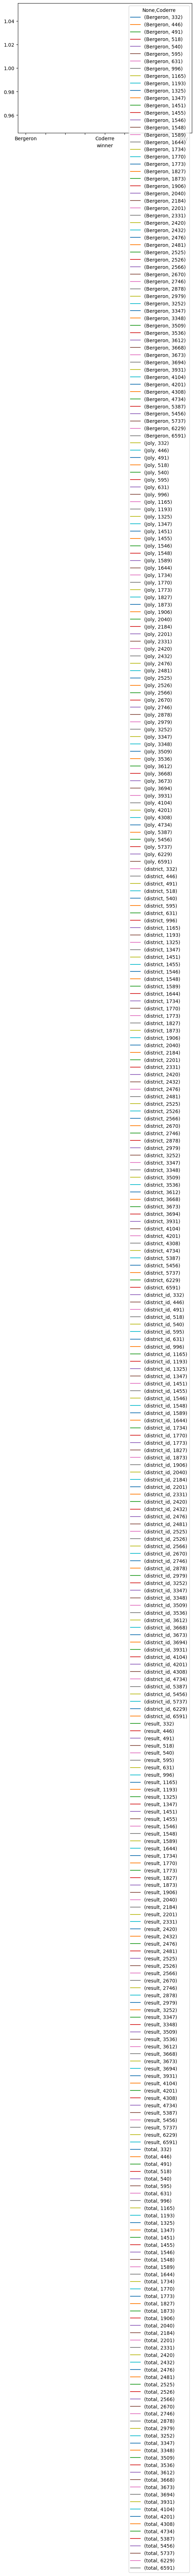

In [54]:
t.plot()

In [55]:
px.bar(df, 'total', 'winner', title= 'olympic medals', color= 'winner')